# Descripción del dataset

El dataset utilizado para este proyecto es Bank Marketing-Additional Full Dataset. Se puede encontrar en Kaggle haciendo uso del siguiente enlace:
https://www.kaggle.com/code/marwanalimohamed/bank-marketing-classification/notebook

Los datos proceden de campañas de marketing telefónico realizadas por una entidad portuguesa entre mayo de 2008 y noviembre de 2010. El objetivo de las campañas era contactar con clientes para ofrecerles la suscripción de un depósito a plazo. El problema de "Machine Learning" a abordar es una clasificación binaria. El objetivo es predecir si un determinado cliente se subscribirá o no a un depósito a plazos.

## Descripción de las variables del dataset:


1. Datos de los clientes.

- age: Edad del cliente.
- job: tipo de trabajo del cliente.
- marital: estado civil del cliente.
- education: Nivel educativo alcanzado por el cliente.
- default: Indica si tiene créditos en situación de impago
- housing: indica si tiene un préstamo hipotecario.
- loan: indica si tiene un préstamo personal.

2. Datos relacionados con el último contacto de la campaña pasada.

- contact: tipo de contacto utilizado durante la campaña.
- month: mes en el cual se realizó la campaña.
- day_of_week: día de la semana en que se realizó el último contacto.
- duration: duración del último contacto telefónico en segundos.

3. Variables relacionadas con campañas anteriores.

- campaign: Número de contactos realizados durante la campaña actual para este cliente.
- pdays: Número de días transcurridos desde el último contacto en una campaña anterior. 999 indica que no fue contactado previamente.
- previous: número de contactos realizado durante la campaña actual.
- poutcome: Resultado de la campaña anterior.

4. Variables socieconómicas.

- emp.var.rate: tasa de varación del empleo (variación trimestral).
- cons.price.idx: Índice de precios al consumo (indicador mensual).
- cons.conf.idx: Índice de confianza del consumidor (indicador mensual).
- euribor3m : Tipo de interés Euribor a 3 meses (indicador diario).
- nr.employed: Número de empleados (indicador trimestral).

5. Variable objetivo.

- y: Indica si el cliente ha suscrito un depósito a plazo (yes, no).


# Importación de las librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)  # muestra todas las columnas
pd.set_option('display.width', None)        # ajusta el ancho automáticamente
pd.set_option('display.max_colwidth', None) # muestra todo el contenido de cada columna

# 1. Carga y selección de los datos

In [2]:
df_raw = pd.read_csv(r".\bank-additional-full.csv", sep = ';')
print(f"Dataset cargado con éxito.")

Dataset cargado con éxito.


In [3]:
print(f"El dataset contiene {df_raw.shape[0]} filas y {df_raw.shape[1]} columnas.")

El dataset contiene 41188 filas y 21 columnas.


In [4]:
df_raw.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df_raw.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


Por el momento no eliminamos ninguna variable puesto que, no hay ninguna que a simple vista podamos indicar que no aporte información o sea irrelevante.
La variable y es la variable objetivo. A partir de este dataset, el objetivo sería entrenar un modelo de clasificación que prediga el valor de la variable y.

# 2. Preprocesamiento

## 2.1 Filas duplicadas

In [6]:
num_duplicadas = df_raw.duplicated().sum()
print("Número de filas duplicadas:", num_duplicadas)

Número de filas duplicadas: 12


In [7]:
df_raw[df_raw.duplicated() == True]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [8]:
print("Eliminamos estas filas duplicadas.")
df_sin_duplicados = df_raw.drop_duplicates()
print(f"Ahora el dataset contiene {df_sin_duplicados.shape[0]} filas y {df_sin_duplicados.shape[1]} columnas.")
print("Ya disponemos de un dataset sin duplicados.")

Eliminamos estas filas duplicadas.
Ahora el dataset contiene 41176 filas y 21 columnas.
Ya disponemos de un dataset sin duplicados.


## 2.2 Valores faltantes

In [9]:
df_sin_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

Como el número de filas totales es 41188, no hay ningún valor nulo en ninguna de las columnas. Sin embargo, habría que realizar un análisis detallado de los diferentes valores que aparecen en cada columna. En alguna de ellas podrían aparecer valores como unknown.

In [10]:
#Variables numéricas:
variables_numericas = df_sin_duplicados.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nVariables numéricas ({len(variables_numericas)}):")
for var in variables_numericas:
    print(f"  - {var}: rango [{df_sin_duplicados[var].min()}, {df_sin_duplicados[var].max()}]")


Variables numéricas (10):
  - age: rango [17, 98]
  - duration: rango [0, 4918]
  - campaign: rango [1, 56]
  - pdays: rango [0, 999]
  - previous: rango [0, 7]
  - emp.var.rate: rango [-3.4, 1.4]
  - cons.price.idx: rango [92.201, 94.767]
  - cons.conf.idx: rango [-50.8, -26.9]
  - euribor3m: rango [0.634, 5.045]
  - nr.employed: rango [4963.6, 5228.1]


No se observa ningún aspecto extraño en ninguna variable numérica. Para pdays, como se ha definido en las variables en la segunda celda, cuando toma el valor 999, significa que el cliente no fue contactado anteriormente. Sin embargo se trata de un valor muy alto para incluirlo en el modelo. Es por ello que mi planteamiento es el de sustituir estos valores por la media, la mediana o por un valor constante. Opto por el valor constante porque en este caso el 999 tiene un signiicado especial: no se ha contactado el cliente. Como el rango de esta variable es de [0,999] lo sustituiré por -1:

In [11]:
df_sin_duplicados.loc[:, 'pdays'] = df_sin_duplicados['pdays'].replace(999, -1)
print(f"Rango [{df_sin_duplicados['pdays'].min()}, {df_sin_duplicados['pdays'].max()}]")


Rango [-1, 27]


In [12]:
# Analizamos ahora las variables categóricas:
variables_categoricas = df_sin_duplicados.select_dtypes(include=['object']).columns.tolist()
for col in variables_categoricas:
    print(f"\n{col}:")
    print(df_sin_duplicados[col].unique())


job:
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

marital:
['married' 'single' 'divorced' 'unknown']

education:
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

default:
['no' 'unknown' 'yes']

housing:
['no' 'yes' 'unknown']

loan:
['no' 'yes' 'unknown']

contact:
['telephone' 'cellular']

month:
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

day_of_week:
['mon' 'tue' 'wed' 'thu' 'fri']

poutcome:
['nonexistent' 'failure' 'success']

y:
['no' 'yes']


Vemos que en ocasiones aparece el valor 'unknown'. Vamos a sustituirlo por un valor vacío:

In [13]:
df_sin_duplicados[variables_categoricas] = df_sin_duplicados[variables_categoricas].replace('unknown', np.nan)
df_sin_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             40846 non-null  object 
 2   marital         41096 non-null  object 
 3   education       39446 non-null  object 
 4   default         32580 non-null  object 
 5   housing         40186 non-null  object 
 6   loan            40186 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

C:\Users\victo\AppData\Local\Temp\ipykernel_24332\2897513882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_duplicados[variables_categoricas] = df_sin_duplicados[variables_categoricas].replace('unknown', np.nan)


In [14]:
#Veamos qué porcentaje de nulos hay en cada caolumna:
porcentaje_nulos = df_sin_duplicados[variables_categoricas].isna().mean() * 100

# Mostrar resultados de forma ordenada
print(porcentaje_nulos.sort_values(ascending=False))



default        20.876239
education       4.201477
housing         2.404313
loan            2.404313
job             0.801438
marital         0.194288
contact         0.000000
month           0.000000
day_of_week     0.000000
poutcome        0.000000
y               0.000000
dtype: float64


Se observa que para la mayoría de las variables el porcentaje de valores nulos es muy bajo (menos de un 5%). Existe también una variable con un porcentaje alto de valores nulos: default.
Así, la extrategia que llevaremos a cabo será la siguiente, para las variables education, housing, loan, job y para marital, se sustituirán los valores nulos por la moda. Para el caso del campo default, se sustituirán los valores nulos por una nueva categoría: "missing".


In [15]:
columnas_moda = ['education', 'housing', 'loan', 'job', 'marital']

for col in columnas_moda:
    moda = df_sin_duplicados[col].mode()[0]
    df_sin_duplicados.loc[:, col] = df_sin_duplicados[col].fillna(moda)

# Verificar que ya no hay nulos
print(df_sin_duplicados[columnas_moda].isna().sum())

education    0
housing      0
loan         0
job          0
marital      0
dtype: int64


In [16]:
df_sin_duplicados.loc[:, 'default'] = df_sin_duplicados['default'].fillna('missing')
print(df_sin_duplicados['default'].isna().mean() * 100)



0.0


## 2.3 Errores tipográficos

Observando los diferentes valores que pueden tomar las variables categóricas, se observa que no existen los errores tipográficos en nuestro dataset.

## 2.4 Incoherencias en las variables numéricas

Analizando el rango de valores que toman las variables numéricas, podemos confirmar que todas las variabes numéricas se encuentran en un rango de valores coherentes.

## 2.5 Conversión del tipo de datos

In [17]:
df_sin_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

El tipo de todas las variables es coherente. No es necesario realizar ningún cambio del tipo int -> float.

## 2.6 Manejo de outliers

In [18]:
def detectar_outliers_iqr(data, column):
    """
    Detecta outliers usando el método IQR.
    Retorna límites inferior y superior, y máscara de outliers.
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers_mask = (data[column] < limite_inferior) | (data[column] > limite_superior)

    return limite_inferior, limite_superior, outliers_mask

# Aplicar detección de outliers a variables numéricas
print("\nAnálisis de outliers por variable numérica:")
print("-" * 70)
variables_numericas = df_sin_duplicados.select_dtypes(include=[np.number]).columns.tolist()
outliers_summary = []
for col in variables_numericas:
    if col != 'fnlwgt':  # Excluir variable técnica
        lim_inf, lim_sup, mask = detectar_outliers_iqr(df_sin_duplicados, col)
        n_outliers = mask.sum()
        pct_outliers = (n_outliers / len(df_sin_duplicados)) * 100

        outliers_summary.append({
            'Variable': col,
            'Q1': df_sin_duplicados[col].quantile(0.25),
            'Q3': df_sin_duplicados[col].quantile(0.75),
            'IQR': df_sin_duplicados[col].quantile(0.75) - df_sin_duplicados[col].quantile(0.25),
            'Límite Inferior': lim_inf,
            'Límite Superior': lim_sup,
            'N° Outliers': n_outliers,
            '% Outliers': round(pct_outliers, 2)
        })

outliers_df = pd.DataFrame(outliers_summary)
print(outliers_df.to_string(index=False))


Análisis de outliers por variable numérica:
----------------------------------------------------------------------
      Variable       Q1       Q3     IQR  Límite Inferior  Límite Superior  N° Outliers  % Outliers
           age   32.000   47.000  15.000           9.5000          69.5000          468        1.14
      duration  102.000  319.000 217.000        -223.5000         644.5000         2963        7.20
      campaign    1.000    3.000   2.000          -2.0000           6.0000         2406        5.84
         pdays   -1.000   -1.000   0.000          -1.0000          -1.0000         1515        3.68
      previous    0.000    0.000   0.000           0.0000           0.0000         5625       13.66
  emp.var.rate   -1.800    1.400   3.200          -6.6000           6.2000            0        0.00
cons.price.idx   93.075   93.994   0.919          91.6965          95.3725            0        0.00
 cons.conf.idx  -42.700  -36.400   6.300         -52.1500         -26.9500          

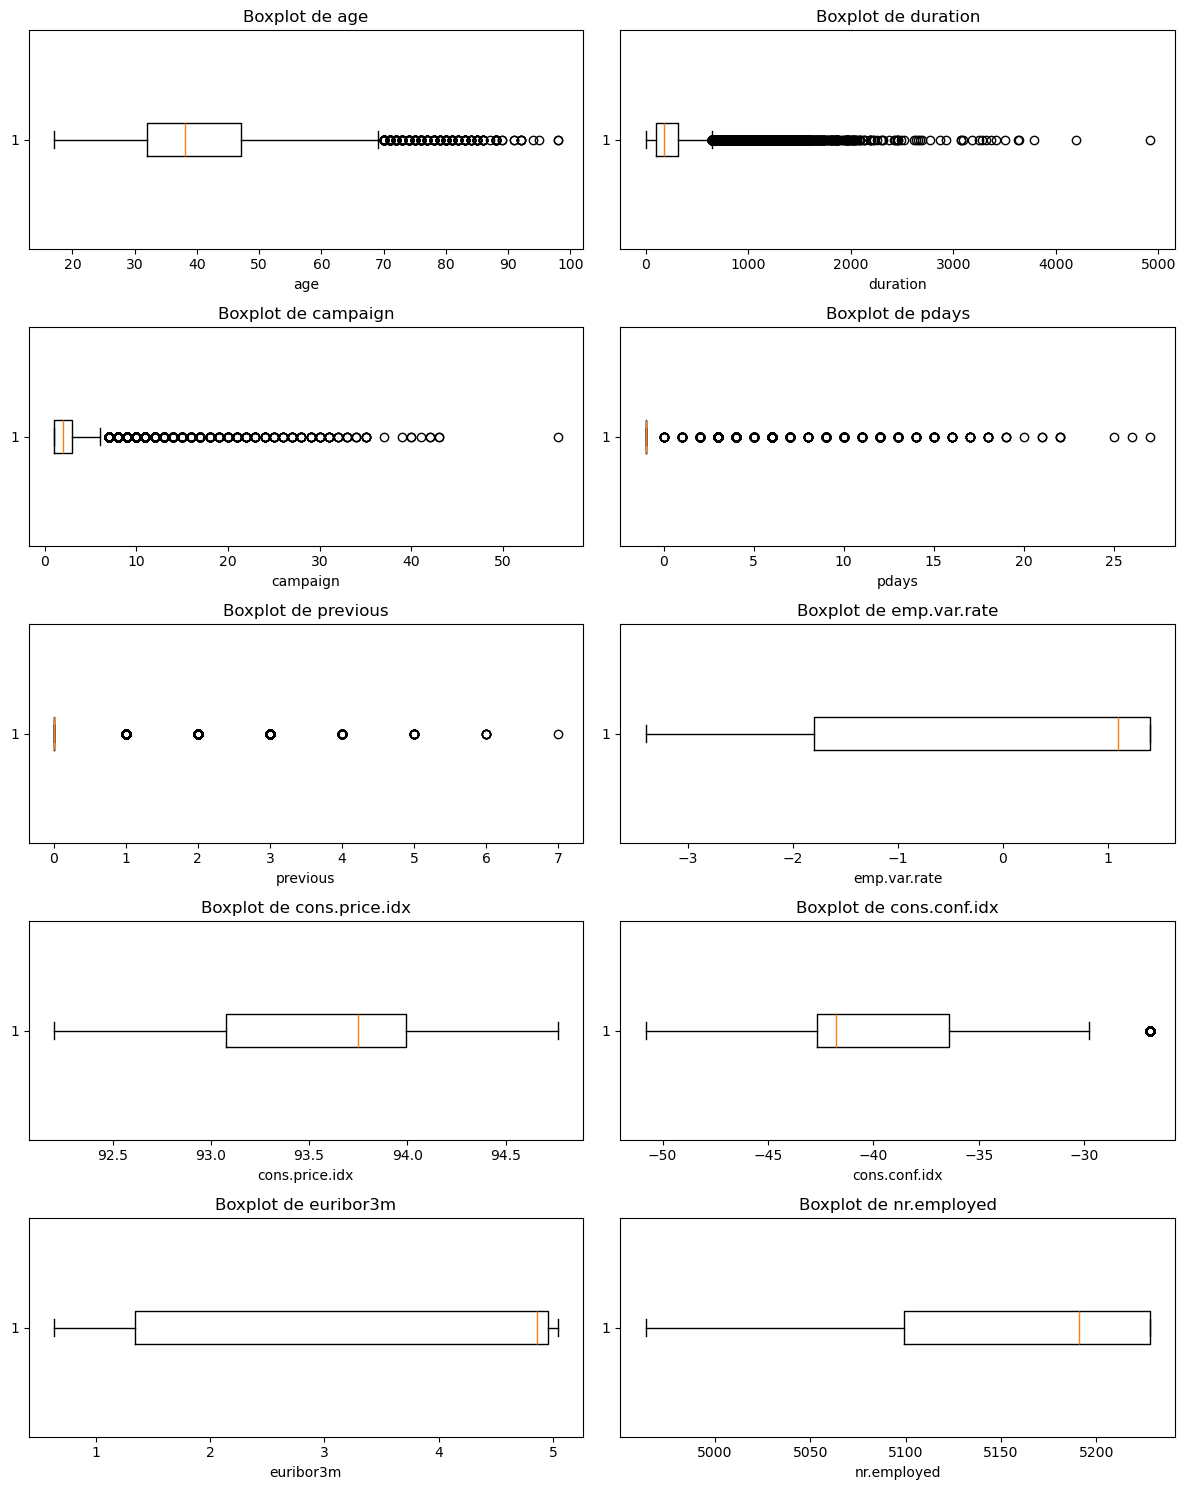

In [19]:
n = len(variables_numericas)

# Número de filas necesarias (2 por fila)
n_filas = (n + 1) // 2

fig, axes = plt.subplots(n_filas, 2, figsize=(12, n_filas*3))
axes = axes.flatten()  # Para iterar fácilmente aunque sobren subplots

for i, col in enumerate(variables_numericas):
    axes[i].boxplot(df_sin_duplicados[col], vert=False)
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_xlabel(col)

# Si hay un subplot sobrante, lo eliminamos
if n % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

Transformaciones que aplicaremos a cada variable:
- age: el porcentaje de los outliers es bastante bajo. Además, el valor más elevado es de 69.5, que es un valor coherente.
- duration: el porcentaje de los outliers es considerable (7,2%). Como se trata de una variable que únicamente toma valores positivos y tiene un skew alto, el tipo de transformación que se aplicará será log1p.
- campaign: los valores atípicos son reales. Sin embargo hay valores muy extremos. Es por ello que se caperá al percentil 95
- pdays: Como la cantidad de -1 es elevada, se creará una nueva variable que únitamente tomará los valores 0 (si un cliente no ha sido contactado desde la última campaña y 1 si e cliente sí lo ha sido).
- previus: El porcentaje de outliers también es elevado. Además, contiene muchos ceros. Es por ello que se sustituirá esta columna por otra que indique si ha sido contactado anteriormente (1) y si no lo ha sido (0).
- El resto de las variables se dejarán tal cual están, puesto que, o no presentan outliers, o disponenen de muy pocos valores atípicos.

In [20]:
df_sin_outliers = df_sin_duplicados.copy()


# 2️ Duration: aplicar log1p
df_sin_outliers['duration_log'] = np.log1p(df_sin_outliers['duration'])

# 3️ Campaign: capear al percentil 95
p95 = df_sin_outliers['campaign'].quantile(0.95)
df_sin_outliers['campaign_capped'] = np.where(df_sin_outliers['campaign'] > p95, p95, df_sin_outliers['campaign'])

# 4️ Pdays: crear variable binaria si ha sido contactado
df_sin_outliers['contactado'] = np.where(df_sin_outliers['pdays'] == -1, 0, 1)


# 5️ Previous: crear variable binaria si ha sido contactado previamente
df_sin_outliers['contactado_previamente'] = np.where(df_sin_outliers['previous'] > 0, 1, 0)
df_sin_outliers.drop(columns=['previous'], inplace=True)  # eliminamos la original

print("Transformaciones aplicadas")

Transformaciones aplicadas


Veamos ahora los outliers que tenemos después de haber aplicado estas transformaciones:

In [21]:
def detectar_outliers_iqr(data, column):
    """
    Detecta outliers usando el método IQR.
    Retorna límites inferior y superior, y máscara de outliers.
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers_mask = (data[column] < limite_inferior) | (data[column] > limite_superior)

    return limite_inferior, limite_superior, outliers_mask

# Aplicar detección de outliers a variables numéricas
print("\nAnálisis de outliers por variable numérica:")
print("-" * 70)
variables_numericas = df_sin_outliers.select_dtypes(include=[np.number]).columns.tolist()
outliers_summary = []
for col in variables_numericas:
    if col != 'fnlwgt':  # Excluir variable técnica
        lim_inf, lim_sup, mask = detectar_outliers_iqr(df_sin_outliers, col)
        n_outliers = mask.sum()
        pct_outliers = (n_outliers / len(df_sin_outliers)) * 100

        outliers_summary.append({
            'Variable': col,
            'Q1': df_sin_outliers[col].quantile(0.25),
            'Q3': df_sin_outliers[col].quantile(0.75),
            'IQR': df_sin_outliers[col].quantile(0.75) - df_sin_outliers[col].quantile(0.25),
            'Límite Inferior': lim_inf,
            'Límite Superior': lim_sup,
            'N° Outliers': n_outliers,
            '% Outliers': round(pct_outliers, 2)
        })

outliers_df = pd.DataFrame(outliers_summary)
print(outliers_df.to_string(index=False))


Análisis de outliers por variable numérica:
----------------------------------------------------------------------
              Variable          Q1          Q3        IQR  Límite Inferior  Límite Superior  N° Outliers  % Outliers
                   age   32.000000   47.000000  15.000000         9.500000        69.500000          468        1.14
              duration  102.000000  319.000000 217.000000      -223.500000       644.500000         2963        7.20
              campaign    1.000000    3.000000   2.000000        -2.000000         6.000000         2406        5.84
                 pdays   -1.000000   -1.000000   0.000000        -1.000000        -1.000000         1515        3.68
          emp.var.rate   -1.800000    1.400000   3.200000        -6.600000         6.200000            0        0.00
        cons.price.idx   93.075000   93.994000   0.919000        91.696500        95.372500            0        0.00
         cons.conf.idx  -42.700000  -36.400000   6.300000       -

Ahora no disponemos de tantos outliers. Llama la atención que la variable contactado_previamente presente 13,66% de outliers. Sin embargo, es debido a que la mayoría de los clientes no han sido contactado previamente. Es una variable que únicamente toma dos valores y está bastante sesgada. En la varible duraton seguimos viendo 7,20% de outliers porque log1p aplana la distribución, sin embargo, es algo positivo para aplicar modelos de ML de clasificación.

# 3.Transformación 

# 3.1 Escalado/normalización de los datos

# 3.2 Codificación de variables categóricas

In [22]:
print("Número de elementos diferentes en cada variable categórica:")
num_categorias = df_sin_outliers[variables_categoricas].nunique()
print(num_categorias)

Número de elementos diferentes en cada variable categórica:
job            11
marital         3
education       7
default         3
housing         2
loan            2
contact         2
month          10
day_of_week     5
poutcome        3
y               2
dtype: int64


In [23]:
# Recorremos cada columna categórica
for col in variables_categoricas:
    print(f"{col}:")
    print(df_sin_outliers[col].unique())
    print("-" * 40)


job:
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']
----------------------------------------
marital:
['married' 'single' 'divorced']
----------------------------------------
education:
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'illiterate']
----------------------------------------
default:
['no' 'missing' 'yes']
----------------------------------------
housing:
['no' 'yes']
----------------------------------------
loan:
['no' 'yes']
----------------------------------------
contact:
['telephone' 'cellular']
----------------------------------------
month:
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
----------------------------------------
day_of_week:
['mon' 'tue' 'wed' 'thu' 'fri']
----------------------------------------
poutcome:
['nonexistent' 'failure' 'success']
----------------------------------------
y:
['no' 'yes']
------

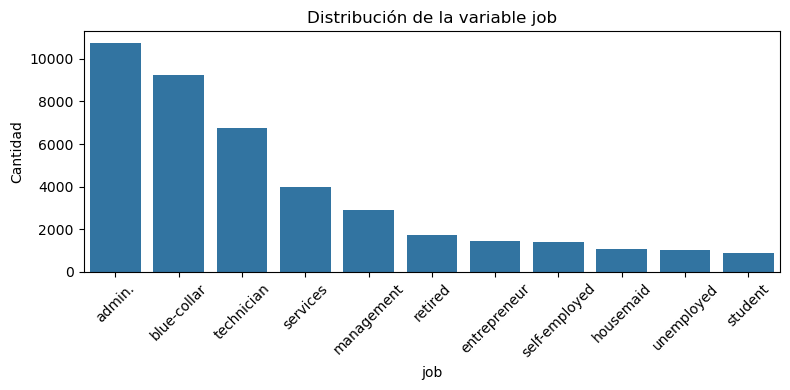

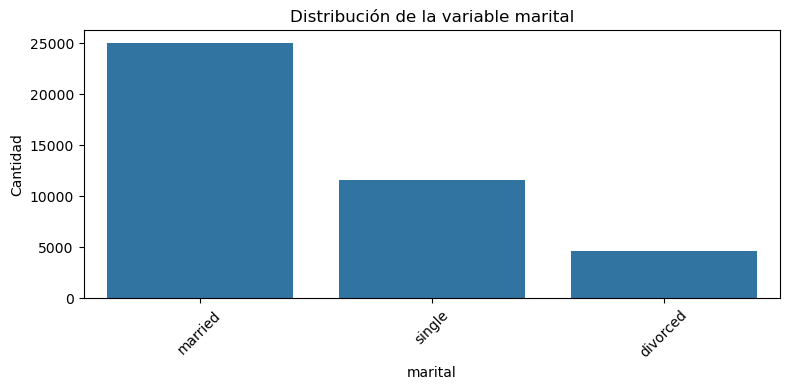

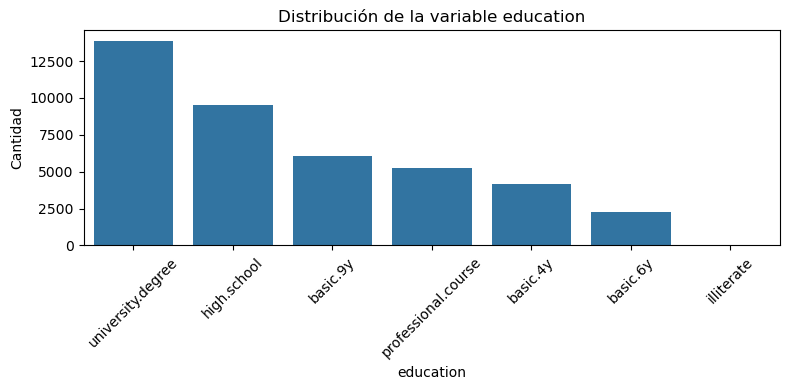

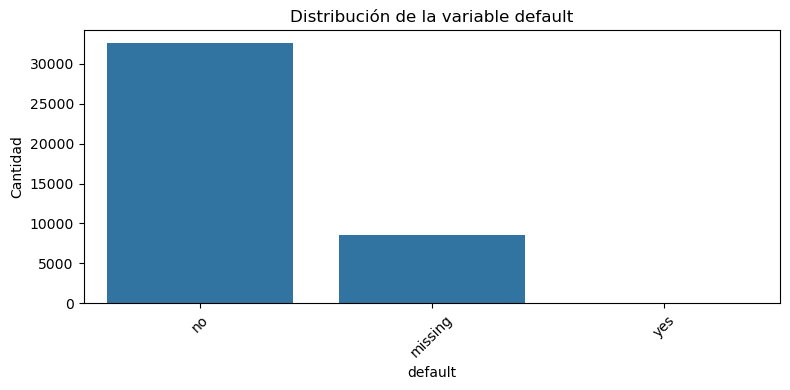

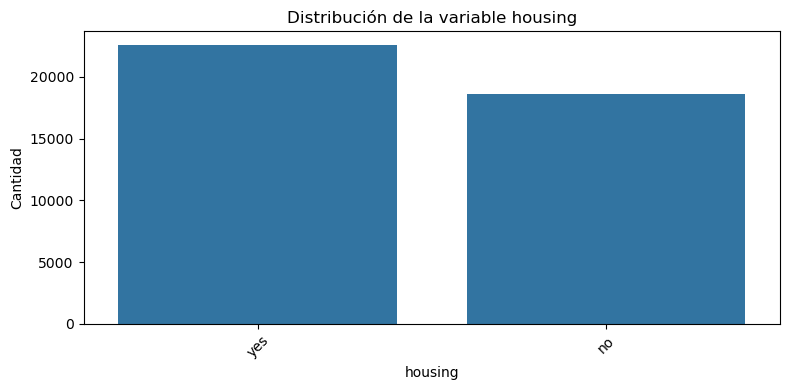

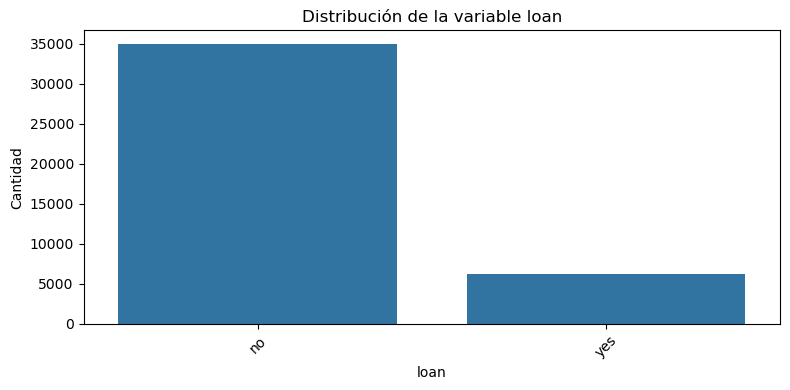

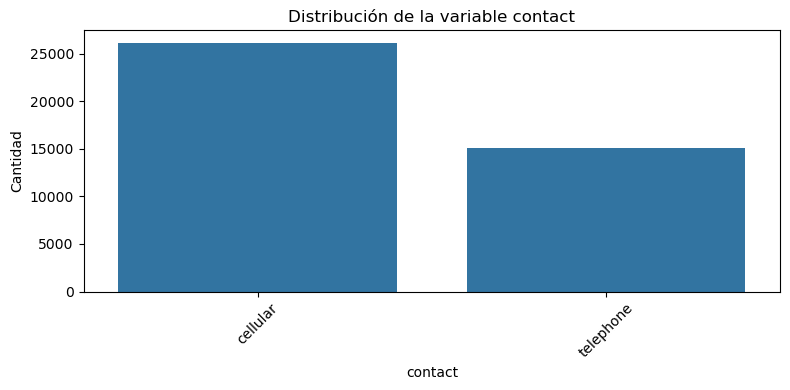

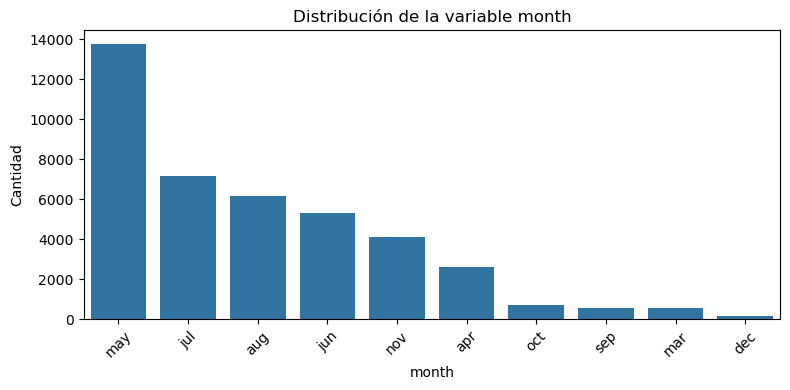

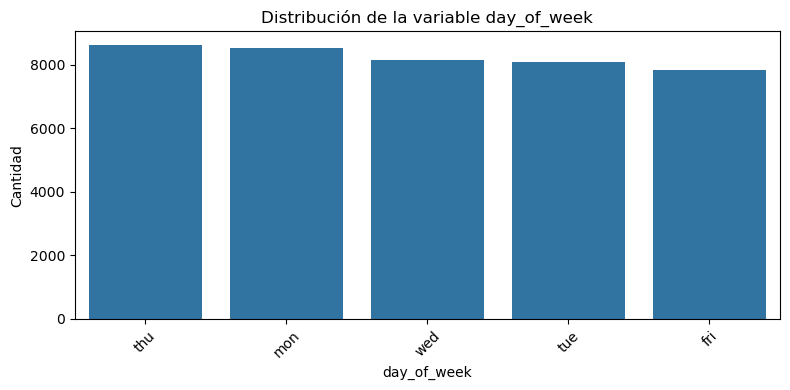

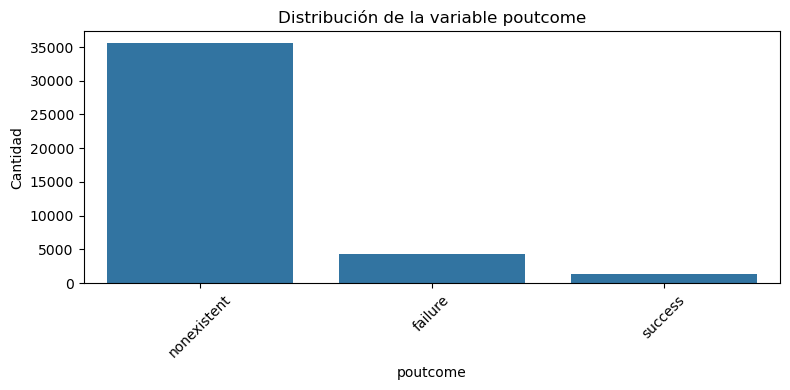

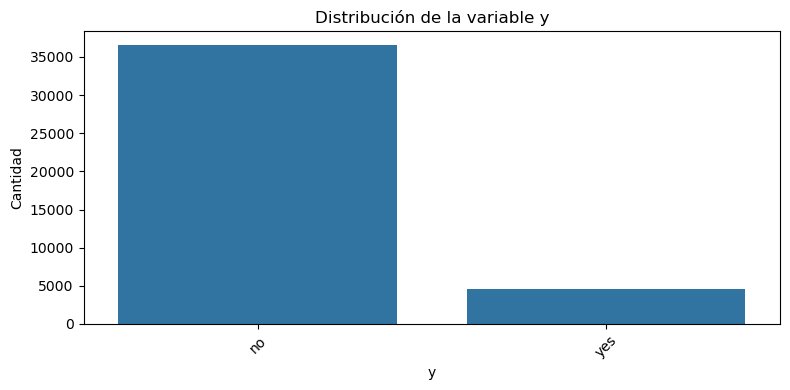

In [24]:
import seaborn as sns
# Recorremos cada columna categórica
for col in variables_categoricas:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df_sin_outliers, x=col, order=df_sin_outliers[col].value_counts().index)
    plt.title(f"Distribución de la variable {col}")
    plt.xticks(rotation=45)  # Rotamos etiquetas si son largas
    plt.ylabel("Cantidad")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


 Veamos si en la variable default el valor yes toma algún valor. Veamos también si en la variable education el valor de illiterate toma algún valor:

In [25]:
print(df_sin_outliers['default'].value_counts())
print(df_sin_outliers['education'].value_counts())


default
no         32577
missing     8596
yes            3
Name: count, dtype: int64
education
university.degree      13894
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
illiterate                18
Name: count, dtype: int64


También se observa que la variable objetivo está desbalanceada. El tratamiento de las clases desbalanceadas se tartará más adelante.

- Aplicaremos label encoding para las columnas default, housing, loan y contact puesto que únicamente pueden tomar dos posibles valores cada una de ellas.
- Para las variables moth y day_of_week aplicaremos el cyclic encoding, ya que estas dos columnas representan datos con un comportamiento periódico.
- Para las variables poutcome y para marital aplicaremos one-hot encoding ya que únicamente toman 3 valores diferentes cada una de ellas.
- Para las variables job y education aplicaremos label enconding, porque, aunque no tienen orden, el número de valores es considerablemente elevado: 11 y 7 respectivamente.

In [26]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df_sin_outliers.copy()


# 1️ Label Encoding para variables binarias
binarias = ['default', 'housing', 'loan', 'contact']
le = LabelEncoder()
for col in binarias:
    df_encoded[col] = le.fit_transform(df_encoded[col])


# 2️ Cyclic encoding para month y day_of_week
# Primero convertimos meses y días a números
meses_dict = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6,
              'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
df_encoded['month_num'] = df_encoded['month'].map(meses_dict)

dias_dict = {'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5}
df_encoded['day_num'] = df_encoded['day_of_week'].map(dias_dict)

# Aplicamos sin y cos
df_encoded['month_sin'] = np.sin(2 * np.pi * df_encoded['month_num']/12)
df_encoded['month_cos'] = np.cos(2 * np.pi * df_encoded['month_num']/12)

df_encoded['day_sin'] = np.sin(2 * np.pi * df_encoded['day_num']/5)
df_encoded['day_cos'] = np.cos(2 * np.pi * df_encoded['day_num']/5)

# Podemos eliminar las columnas originales si queremos
df_encoded.drop(['month', 'month_num', 'day_of_week', 'day_num'], axis=1, inplace=True)


# 3️ One-hot encoding para variables con 3 valores
onehot_vars = ['poutcome', 'marital']
df_encoded = pd.get_dummies(df_encoded, columns=onehot_vars, drop_first=False)
# Convertimos booleanos a 0/1
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'bool':
        df_encoded[col] = df_encoded[col].astype(int)


# 4️ Label Encoding para variables con muchos valores
label_vars = ['job', 'education']
for col in label_vars:
    df_encoded[col] = le.fit_transform(df_encoded[col])


print("Transformaciones aplicadas. Dataset final:")
df_encoded.head()


Transformaciones aplicadas. Dataset final:


,age,job,education,default,housing,loan,contact,duration,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,duration_log,campaign_capped,contactado,contactado_previamente,month_sin,month_cos,day_sin,day_cos,poutcome_failure,poutcome_nonexistent,poutcome_success,marital_divorced,marital_married,marital_single
0,56,3,0,1,0,0,1,261,1,-1,1.1,93.994,-36.4,4.857,5191.0,no,5.568345,1.0,0,0,0.5,-0.866025,0.951057,0.309017,0,1,0,0,1,0
1,57,7,3,0,0,0,1,149,1,-1,1.1,93.994,-36.4,4.857,5191.0,no,5.010635,1.0,0,0,0.5,-0.866025,0.951057,0.309017,0,1,0,0,1,0
2,37,7,3,1,1,0,1,226,1,-1,1.1,93.994,-36.4,4.857,5191.0,no,5.424950,1.0,0,0,0.5,-0.866025,0.951057,0.309017,0,1,0,0,1,0
3,40,0,1,1,0,0,1,151,1,-1,1.1,93.994,-36.4,4.857,5191.0,no,5.023881,1.0,0,0,0.5,-0.866025,0.951057,0.309017,0,1,0,0,1,0
4,56,7,3,1,0,1,1,307,1,-1,1.1,93.994,-36.4,4.857,5191.0,no,5.730100,1.0,0,0,0.5,-0.866025,0.951057,0.309017,0,1,0,0,1,0


# 3.3 Creación de nuevas variables: feature engineering

# 3.4 Reducción de la dimensionalidad